<a href="https://colab.research.google.com/github/ML-HW-SYS/a4-MaximClouser/blob/main/3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/gdrive/MyDrive/ece5545/git_username.txt') as f:
    handle = f.readline().strip()

In [3]:
YOUR_TOKEN = token
YOUR_HANDLE = handle
BRANCH = "main"

# %mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545
!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a4-{YOUR_HANDLE}.git
%cd /content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}
!git checkout {BRANCH}
!git pull
%cd /content/gdrive/MyDrive/ece5545

PROJECT_ROOT = f"/content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}"

/content/gdrive/MyDrive/ece5545
fatal: destination path 'a4-MaximClouser' already exists and is not an empty directory.
/content/gdrive/MyDrive/ece5545/a4-MaximClouser
Already on 'main'
Your branch is up to date with 'origin/main'.
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 3), reused 1 (delta 1), pack-reused 5
Unpacking objects: 100% (9/9), 153.55 KiB | 331.00 KiB/s, done.
From https://github.com/ML-HW-SYS/a4-MaximClouser
   c21a07e..2c3cb2b  main       -> origin/main
Updating c21a07e..2c3cb2b
Fast-forward
 1-numerical_precision.ipynb | 143 ++++++++++++++------
 2-svd_rank.ipynb            |   2 +-
 3_MNIST.ipynb               | 454 +++++++++++++++++++++++++++++++++++++---------------------------
 3 files changed, 362 insertions(+), 237 deletions(-)
/content/gdrive/MyDrive/ece5545


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
!ls {PROJECT_ROOT}
%cd a4-MaximClouser

1-numerical_precision.ipynb  2-svd_rank.ipynb  3_MNIST.ipynb  data  mnist.py  README.md  src  tests
/content/gdrive/MyDrive/ece5545/a4-MaximClouser


In [6]:
!pip install torch numpy matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [18]:
import matplotlib.pyplot as plt

def plot_compression_vs_metrics(ratios, times, acc):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(ratios, acc, marker='o', linestyle='-')
    ax1.set_xlabel('Compression Ratio')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_title('Compression Ratio vs. Accuracy')
    ax1.grid(True)

    ax2.plot(ratios, times, marker='o', linestyle='-', color='r')
    ax2.set_xlabel('Compression Ratio')
    ax2.set_ylabel('Measured Runtime (ms)')
    ax2.set_title('Compression Ratio vs. Runtime')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def plot_runtime_vs_accuracy(times, acc, ratios):
    plt.figure(figsize=(8, 5))

    norm = plt.Normalize(min(ratios), max(ratios))
    colors = plt.cm.viridis(norm(ratios))

    scatter = plt.scatter(times, acc, color=colors, marker='o', s=50)

    cbar = plt.colorbar(scatter)
    cbar.set_label('Compression Ratio')

    plt.xlabel('Measured Runtime (ms)')
    plt.ylabel('Accuracy (%)')
    plt.title('Runtime vs. Accuracy')
    plt.grid(True)
    plt.show()

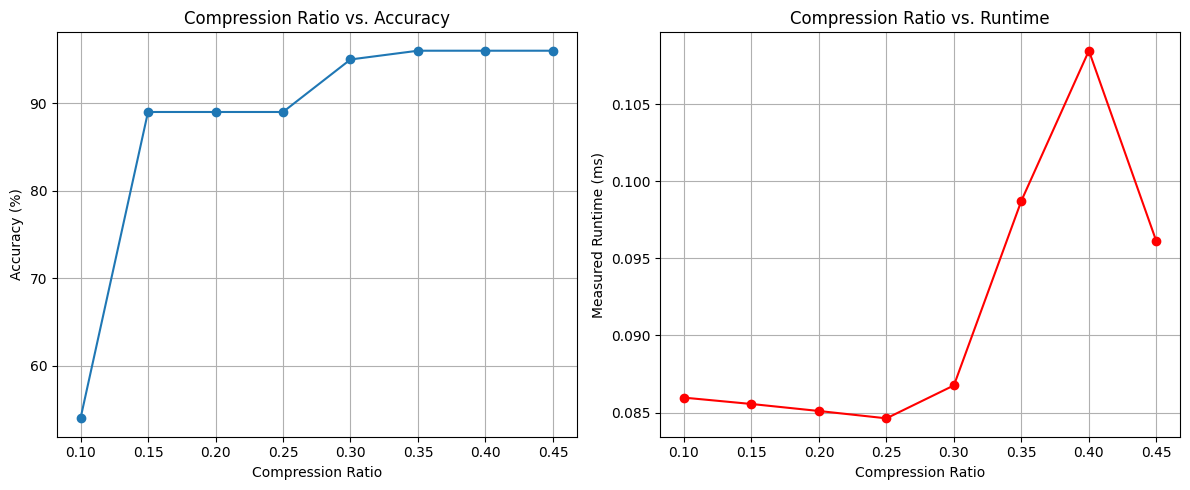

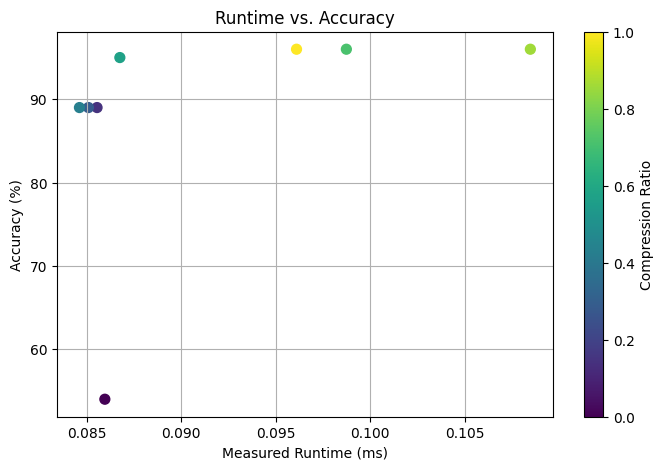

In [19]:
ratios = [0.05, 0.1, 0.15, 0.2, 0.25 ,0.3, 0.35, 0.4, 0.45]
times = [0.04083, 0.041516, 0.0382525, 0.0493820, 0.0612959, 0.049423, 0.040533, 0.03880245, 0.039248]
acc = [96,51, 90, 91, 91, 95, 96, 96,96]

ratios = [0.1, 0.15, 0.2, 0.25 ,0.3, 0.35, 0.4, 0.45]
times = [0.0859652, 0.0855527,0.08509843,0.08462195,0.08675835,0.09873714, 0.108466815,0.0961016416]
acc = [54,89,89,89,95,96,96,96]

plot_compression_vs_metrics(ratios, times, acc)
plot_runtime_vs_accuracy(times, acc, ratios)

In [ ]:
!python mnist.py --ratio=0.05

RANK:  26
RANK:  6
RANK:  0
Train Epoch: 1 	Average Loss: 0.481558

Test set: Average loss: 0.2751, Accuracy: 9127/10000 (91%)

Average time per predicion: 0.09664311408996581
Train Epoch: 2 	Average Loss: 0.213982

Test set: Average loss: 0.1880, Accuracy: 9408/10000 (94%)

Average time per predicion: 0.08972802162170411
Train Epoch: 3 	Average Loss: 0.165634

Test set: Average loss: 0.1552, Accuracy: 9524/10000 (95%)

Average time per predicion: 0.08770363330841065
Train Epoch: 4 	Average Loss: 0.143273

Test set: Average loss: 0.1401, Accuracy: 9565/10000 (96%)

Average time per predicion: 0.08525183200836181
Train Epoch: 5 	Average Loss: 0.130537

Test set: Average loss: 0.1319, Accuracy: 9592/10000 (96%)

Average time per predicion: 0.0859652042388916


In [ ]:
!python mnist.py --ratio=0.1

RANK:  51
RANK:  13
RANK:  1
Train Epoch: 1 	Average Loss: 1.664914

Test set: Average loss: 1.5438, Accuracy: 2652/10000 (27%)

Average time per predicion: 0.0974431037902832
Train Epoch: 2 	Average Loss: 1.458049

Test set: Average loss: 1.4396, Accuracy: 4194/10000 (42%)

Average time per predicion: 0.08819725513458253
Train Epoch: 3 	Average Loss: 1.372386

Test set: Average loss: 1.3849, Accuracy: 4882/10000 (49%)

Average time per predicion: 0.11989998817443848
Train Epoch: 4 	Average Loss: 1.322881

Test set: Average loss: 1.3519, Accuracy: 5224/10000 (52%)

Average time per predicion: 0.08528289794921876
Train Epoch: 5 	Average Loss: 1.291569

Test set: Average loss: 1.3309, Accuracy: 5380/10000 (54%)

Average time per predicion: 0.12993688583374025


In [ ]:
!python mnist.py --ratio=0.15

0.15
RANK:  77
RANK:  19
RANK:  2
Train Epoch: 1 	Average Loss: 1.032811

Test set: Average loss: 0.7333, Accuracy: 7963/10000 (80%)

Average time per predicion: 0.11221227645874024
Train Epoch: 2 	Average Loss: 0.638233

Test set: Average loss: 0.5976, Accuracy: 8525/10000 (85%)

Average time per predicion: 0.08380882740020752
Train Epoch: 3 	Average Loss: 0.530642

Test set: Average loss: 0.5346, Accuracy: 8742/10000 (87%)

Average time per predicion: 0.08362705707550049
Train Epoch: 4 	Average Loss: 0.472578

Test set: Average loss: 0.4981, Accuracy: 8870/10000 (89%)

Average time per predicion: 0.12364668846130371
Train Epoch: 5 	Average Loss: 0.437030

Test set: Average loss: 0.4762, Accuracy: 8928/10000 (89%)

Average time per predicion: 0.08555271625518798


In [ ]:
!python mnist.py --ratio=0.2

0.2
RANK:  102
RANK:  26
RANK:  2
Train Epoch: 1 	Average Loss: 1.017146

Test set: Average loss: 0.7235, Accuracy: 7984/10000 (80%)

Average time per predicion: 0.08423020839691163
Train Epoch: 2 	Average Loss: 0.631214

Test set: Average loss: 0.5907, Accuracy: 8528/10000 (85%)

Average time per predicion: 0.08353736400604247
Train Epoch: 3 	Average Loss: 0.523263

Test set: Average loss: 0.5272, Accuracy: 8759/10000 (88%)

Average time per predicion: 0.10944919586181641
Train Epoch: 4 	Average Loss: 0.464804

Test set: Average loss: 0.4917, Accuracy: 8882/10000 (89%)

Average time per predicion: 0.09677407741546631
Train Epoch: 5 	Average Loss: 0.429441

Test set: Average loss: 0.4708, Accuracy: 8943/10000 (89%)

Average time per predicion: 0.08509843349456787


In [ ]:
!python mnist.py --ratio=0.25

0.25
RANK:  128
RANK:  32
RANK:  2
Train Epoch: 1 	Average Loss: 1.014003

Test set: Average loss: 0.7209, Accuracy: 7982/10000 (80%)

Average time per predicion: 0.12004024982452392
Train Epoch: 2 	Average Loss: 0.629736

Test set: Average loss: 0.5878, Accuracy: 8534/10000 (85%)

Average time per predicion: 0.111527419090271
Train Epoch: 3 	Average Loss: 0.521179

Test set: Average loss: 0.5243, Accuracy: 8774/10000 (88%)

Average time per predicion: 0.08461606502532959
Train Epoch: 4 	Average Loss: 0.462564

Test set: Average loss: 0.4885, Accuracy: 8868/10000 (89%)

Average time per predicion: 0.08430323600769042
Train Epoch: 5 	Average Loss: 0.427042

Test set: Average loss: 0.4677, Accuracy: 8941/10000 (89%)

Average time per predicion: 0.0846219539642334


In [ ]:
!python mnist.py --ratio=0.3

0.3
RANK:  154
RANK:  38
RANK:  3
Train Epoch: 1 	Average Loss: 0.627294

Test set: Average loss: 0.3223, Accuracy: 9104/10000 (91%)

Average time per predicion: 0.08535556793212891
Train Epoch: 2 	Average Loss: 0.258038

Test set: Average loss: 0.2349, Accuracy: 9342/10000 (93%)

Average time per predicion: 0.08754096031188965
Train Epoch: 3 	Average Loss: 0.198480

Test set: Average loss: 0.2010, Accuracy: 9453/10000 (95%)

Average time per predicion: 0.08693580627441407
Train Epoch: 4 	Average Loss: 0.170131

Test set: Average loss: 0.1842, Accuracy: 9510/10000 (95%)

Average time per predicion: 0.08508884906768799
Train Epoch: 5 	Average Loss: 0.153371

Test set: Average loss: 0.1751, Accuracy: 9541/10000 (95%)

Average time per predicion: 0.08675835132598876


In [ ]:
!python mnist.py --ratio=0.35

0.35
RANK:  179
RANK:  45
RANK:  4
Train Epoch: 1 	Average Loss: 0.529843

Test set: Average loss: 0.2516, Accuracy: 9242/10000 (92%)

Average time per predicion: 0.08676021099090576
Train Epoch: 2 	Average Loss: 0.208963

Test set: Average loss: 0.1823, Accuracy: 9484/10000 (95%)

Average time per predicion: 0.08767502307891846
Train Epoch: 3 	Average Loss: 0.157049

Test set: Average loss: 0.1530, Accuracy: 9559/10000 (96%)

Average time per predicion: 0.13250834941864015
Train Epoch: 4 	Average Loss: 0.132211

Test set: Average loss: 0.1383, Accuracy: 9595/10000 (96%)

Average time per predicion: 0.08820919990539551
Train Epoch: 5 	Average Loss: 0.117811

Test set: Average loss: 0.1303, Accuracy: 9621/10000 (96%)

Average time per predicion: 0.09873714447021484


In [ ]:
!python mnist.py --ratio=0.4

0.4
RANK:  205
RANK:  51
RANK:  4
Train Epoch: 1 	Average Loss: 0.526697

Test set: Average loss: 0.2479, Accuracy: 9256/10000 (93%)

Average time per predicion: 0.08937041759490967
Train Epoch: 2 	Average Loss: 0.204115

Test set: Average loss: 0.1799, Accuracy: 9477/10000 (95%)

Average time per predicion: 0.0955235242843628
Train Epoch: 3 	Average Loss: 0.153336

Test set: Average loss: 0.1504, Accuracy: 9545/10000 (95%)

Average time per predicion: 0.09846575260162353
Train Epoch: 4 	Average Loss: 0.129013

Test set: Average loss: 0.1351, Accuracy: 9601/10000 (96%)

Average time per predicion: 0.0883450746536255
Train Epoch: 5 	Average Loss: 0.114823

Test set: Average loss: 0.1269, Accuracy: 9628/10000 (96%)

Average time per predicion: 0.10846681594848633


In [ ]:
!python mnist.py --ratio=0.45

0.45
RANK:  230
RANK:  58
RANK:  4
Train Epoch: 1 	Average Loss: 0.518125

Test set: Average loss: 0.2561, Accuracy: 9259/10000 (93%)

Average time per predicion: 0.08726160526275635
Train Epoch: 2 	Average Loss: 0.206899

Test set: Average loss: 0.1857, Accuracy: 9460/10000 (95%)

Average time per predicion: 0.1478351593017578
Train Epoch: 3 	Average Loss: 0.155592

Test set: Average loss: 0.1558, Accuracy: 9549/10000 (95%)

Average time per predicion: 0.08851263523101806
Train Epoch: 4 	Average Loss: 0.130926

Test set: Average loss: 0.1420, Accuracy: 9604/10000 (96%)

Average time per predicion: 0.08906095027923584
Train Epoch: 5 	Average Loss: 0.116597

Test set: Average loss: 0.1348, Accuracy: 9624/10000 (96%)

Average time per predicion: 0.09610164165496826
